In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [176]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [3]:
df2 = df.copy()

In [4]:
dup_df = df2.duplicated(subset=['주문번호'])
print(dup_df)

num_dup_df = dup_df.sum()
print(num_dup_df)

0         False
1         False
2          True
3         False
4          True
          ...  
218596    False
218597     True
218598    False
218599    False
218600    False
Length: 218601, dtype: bool
63806


In [7]:
dup_df_df = pd.concat([df2, dup_df], axis = 1)

In [8]:
dup_df_df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,0
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,False
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,False
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,True
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,False
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,False
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,True
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,False
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,False


In [10]:
dup_df_df.rename(columns = {0: '중복여부'}, inplace = True)

In [11]:
df5 = df.copy()

In [15]:
def all_same(items):
    target = items.iloc[0]
    for i in items:
        if target != i:
            return False
    return True

def reduce_dataframe(target, key):
    data = []
    
    unique_keys = target[key].unique()
    columns = target.columns
    columns = columns.delete(columns.get_loc(key))
    
    for fcd in unique_keys:
        part = target[(target[key] == fcd)]
        part = part.fillna('')
        if part.empty: continue
        item = {key: fcd}
        for column in columns:
            if all_same(part[column]):
                item[column] = part[column].iloc[0]
            else:
                item[column] = part[column].to_list()
        data.append(item)
    return pd.DataFrame(data)

new_df = reduce_dataframe(df5, "주문번호")

In [16]:
new_df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]","[5000, 67500]",신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,"[2, 1, 1, 1, 1]","[30000, 750, 16000, 6000, 20000]",신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,,
4,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
154790,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08 10:35:02,배송완료,N,,
154791,221108104041264,에이스디포,"[[스마트 HBE*초도] 입체 액자형 현판, [스마트 HBE*초도] 아크릴 사인]","[에이스디포, HB]",1,"[35000, 26900]",웰컴마일,2022-11-08 10:38:21,결제완료,Y,,
154792,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,,
154793,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,,


In [18]:
new_df.head(30)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
154765,221108051159527,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,현금간편결제,2022-11-08 05:09:39,배송준비,N,,
154766,221108063704390,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08 06:34:44,배송완료,N,,
154767,221108065339755,지니,[해법독서논술] 글꾸러미 바인더,HB,15,36000,신용카드,2022-11-08 06:51:18,배송준비,N,,
154768,221108070354385,지니,[한정판매] 스마트 HBM-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 07:01:34,배송준비,N,,
154769,221108074553699,다우기술,[따뜻달달특가] 투썸플레이스-로얄밀크티,투썸플레이스,2,8900,신용카드,2022-11-08 07:43:33,배송완료,N,,
154770,221108075702708,쥬크박스,"[[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송), [학생선물] ...",,"[2, 1]","[3400, 2550]",신 + 포,2022-11-08 07:54:41,미결제,N,,
154771,221108083211324,쥬크박스,[학생선물] 매직 순삭펜 (랜덤발송),,2,3100,신 + 포,2022-11-08 08:29:51,배송중,N,,
154772,221108084044345,다우기술,[따뜻달달특가] 스타벅스-자몽 허니 블랙 티 T,스타벅스,2,9000,신 + 포,2022-11-08 08:38:24,배송완료,N,,
154773,221108090148755,다우기술,[스타벅스] 아이스 스타벅스 돌체라떼 T,스타벅스,1,5300,신용카드,2022-11-08 08:59:27,배송완료,N,,
154774,221108090226267,다우기술,[메가박스] 2인 패키지(관람권2+팝콘L1+탄산음료R2),메가박스,2,64800,신용카드,2022-11-08 09:00:05,배송완료,N,,


In [19]:
new_df_dup = new_df.duplicated(subset=['주문번호'])
print(new_df_dup)

new_df_dup_sum = new_df_dup.sum()
print(new_df_dup_sum)

0         False
1         False
2         False
3         False
4         False
          ...  
154790    False
154791    False
154792    False
154793    False
154794    False
Length: 154795, dtype: bool
0


In [64]:
df6 = df.copy()

In [65]:
df6

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [66]:
df6['처리상태'].unique()
# 구매확정 고객이랑 주문취소, 미결제 고객 나누어서 비교

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [67]:
df6 = df6[df6['처리상태'] == '구매확정']

In [68]:
df6

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN


In [69]:
new_df6 = reduce_dataframe(df6, "주문번호")

In [70]:
new_df6

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]","[5000, 67500]",신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,"[2, 1, 1, 1, 1]","[30000, 750, 16000, 6000, 20000]",신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191218153940815,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실-창문스티커(원...",HB,1,"[5000, 3000, 4000]",신용카드,2019-12-18 15:40:44,구매확정,N,,
4,191218170839143,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,3,48000,신용카드,2019-12-18 17:09:42,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
113098,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,,
113099,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,,
113100,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,,
113101,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,,


In [31]:
list1 = [1, 2, 3]
sum(list1)

6

In [32]:
sum(new_df6['판매금액'][1])

72500

In [34]:
sum(new_df6['판매금액'][0]) # 리스트가 아닌 숫자가 있어서 오류남

TypeError: 'numpy.int64' object is not iterable

In [44]:
x = [1,2,3]
print( isinstance(x, list) )

True


In [45]:
new_df6['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)

0          5000
1         72500
2         72750
3         12000
4         48000
          ...  
113098    19200
113099     2550
113100     1800
113101     3400
113102     1300
Name: 판매금액, Length: 113103, dtype: int64

In [71]:
new_df6['판매금액'] = new_df6['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)

In [81]:
new_df6

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]",72500,신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,"[2, 1, 1, 1, 1]",72750,신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191218153940815,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실-창문스티커(원...",HB,1,12000,신용카드,2019-12-18 15:40:44,구매확정,N,,
4,191218170839143,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,3,48000,신용카드,2019-12-18 17:09:42,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
113098,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,,
113099,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,,
113100,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,,
113101,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,,


In [73]:
new_df6['판매금액'].max()

19800000

In [74]:
new_df6['판매금액'].min()

0

In [75]:
new_df6[new_df6['판매금액'] == 0]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
19442,210319090937572,에이스디포,[스마트 HBM] 회원모집-채우자 족자 현수막_황율리아나님 전용,HB,1,0,,2021-03-19 09:08:48,구매확정,N,스마트해법지앤비학원/02-2603-0205,1개월
71849,220424105415624,쥬크박스,[만들기] 5000 텀블러백 만들기 (옵션선택),,0,0,포인트,2022-04-24 10:52:12,구매확정,N,,


In [51]:
new_df6 = new_df6[new_df6['판매금액'] != 0]

In [76]:
new_df6['판매금액'].min()

0

In [53]:
new_df6[new_df6['판매금액'] == 100]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
42383,211022113201505,다우기술,[해피할로윈 특가] 하리보 골드바렌1800,하리보,1,100,신용카드,2021-10-22 11:30:25,구매확정,N,,
42384,211022113208890,다우기술,[해피할로윈 특가] 하리보 골드바렌1800,하리보,1,100,신용카드,2021-10-22 11:30:31,구매확정,N,,
42385,211022113228758,다우기술,[해피할로윈 특가] 하리보 골드바렌1800,하리보,1,100,신용카드,2021-10-22 11:30:51,구매확정,N,,
42386,211022113229423,다우기술,[해피할로윈 특가] 하리보 골드바렌1800,하리보,1,100,신용카드,2021-10-22 11:30:52,구매확정,N,,
42387,211022113230458,다우기술,[해피할로윈 특가] 하리보 골드바렌1800,하리보,1,100,신용카드,2021-10-22 11:30:54,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
112932,221104100350981,다우기술,[친구톡 특가] 이디야 자몽네이블오렌지 HOT,이디야,1,100,포인트,2022-11-04 10:01:29,구매확정,N,,
112933,221104100404186,다우기술,[친구톡 특가] 이디야 자몽네이블오렌지 HOT,이디야,1,100,포인트,2022-11-04 10:01:44,구매확정,N,,
112935,221104100631106,다우기술,[친구톡 특가] 이디야 자몽네이블오렌지 HOT,이디야,1,100,포인트,2022-11-04 10:04:11,구매확정,N,,
112936,221104100829210,다우기술,[친구톡 특가] 이디야 자몽네이블오렌지 HOT,이디야,1,100,포인트,2022-11-04 10:06:09,구매확정,N,,


In [113]:
df7 = df.copy()

In [114]:
df7['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [115]:
df7[(df7['처리상태'] == '주문취소') | (df7['처리상태'] == '미결제')]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
8,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,NaN,NaN
9,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,NaN,NaN
11,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,NaN,NaN
16,191218174219998,지니,eHBM셀파수학교실-연필(빨강)_1세트 50개입,HB,1,6000,신용카드,2019-12-18 17:43:23,미결제,N,NaN,NaN
17,191218174219998,지니,eHBM셀파수학교실-색연필(빨강)_1세트 5개입,HB,2,2000,신용카드,2019-12-18 17:43:23,미결제,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218559,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,NaN,NaN
218561,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,NaN,NaN
218567,221108075702708,쥬크박스,[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송),NaN,2,3400,신 + 포,2022-11-08 07:54:41,미결제,N,NaN,NaN
218568,221108075702708,쥬크박스,[학생선물] 3000 우주 마블 슬라임,NaN,1,2550,신 + 포,2022-11-08 07:54:41,미결제,N,NaN,NaN


In [116]:
df7 = df7[(df7['처리상태'] == '주문취소') | (df7['처리상태'] == '미결제')]

In [117]:
df7[df7['처리상태'] == '미결제']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
9,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,NaN,NaN
11,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,NaN,NaN
16,191218174219998,지니,eHBM셀파수학교실-연필(빨강)_1세트 50개입,HB,1,6000,신용카드,2019-12-18 17:43:23,미결제,N,NaN,NaN
17,191218174219998,지니,eHBM셀파수학교실-색연필(빨강)_1세트 5개입,HB,2,2000,신용카드,2019-12-18 17:43:23,미결제,N,NaN,NaN
18,191218174219998,지니,eHBM셀파수학교실-색연필(파랑)_1세트 5개입,HB,1,1000,신용카드,2019-12-18 17:43:23,미결제,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218559,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,NaN,NaN
218561,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,NaN,NaN
218567,221108075702708,쥬크박스,[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송),NaN,2,3400,신 + 포,2022-11-08 07:54:41,미결제,N,NaN,NaN
218568,221108075702708,쥬크박스,[학생선물] 3000 우주 마블 슬라임,NaN,1,2550,신 + 포,2022-11-08 07:54:41,미결제,N,NaN,NaN


In [118]:
new_df7 = reduce_dataframe(df7, "주문번호")

In [119]:
new_df7['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)

0           900
1        105000
2         20000
3         30000
4         30000
          ...  
39492     44500
39493    792000
39494     29900
39495      5950
39496      8900
Name: 판매금액, Length: 39497, dtype: int64

In [120]:
new_df7['판매금액'] = new_df7['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)

In [121]:
new_df7

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,,
1,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,,
2,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,,
3,191218174219998,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]",30000,신용카드,2019-12-18 17:43:23,미결제,N,,
4,191218174317524,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]",30000,신용카드,2019-12-18 17:44:21,미결제,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
39492,221108022050700,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,10,44500,신용카드,2022-11-08 02:18:29,미결제,N,,
39493,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,,
39494,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,,
39495,221108075702708,쥬크박스,"[[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송), [학생선물] ...",,"[2, 1]",5950,신 + 포,2022-11-08 07:54:41,미결제,N,,


In [122]:
new_df7['판매금액'].max()

11130000

In [123]:
new_df7['판매금액'].min()

0

In [124]:
new_df7[new_df7['판매금액'] == 0]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
38,191223170919449,라온웍스,[주문제작] HBE 2019겨울방학 전단지-산북교실학원,,1,0,신용카드,2019-12-23 17:10:24,미결제,N,,
60,191226142426230,쥬크박스,[학생선물] 히어로 레이저 요요,쥬크박스,1,0,신용카드,2019-12-26 14:25:33,미결제,N,,
143,200107111249730,산스토어,[동원] 명절 식품 선물세트 + 동원 판호,,1,0,,2020-01-07 11:14:01,미결제,N,,
401,200210085300330,셀러테스트,공동구매 테스트2,,1,0,신용카드,2020-02-10 08:54:25,미결제,N,,
402,200210085337677,셀러테스트,공동구매 테스트2,,1,0,신용카드,2020-02-10 08:55:02,주문취소,N,,
1265,200316144158566,피플이엔티,[한정특가] 황지수 겔형 손소독제(에탄올 62%) 500ml-3개입,(주)뉴필,2,0,신용카드,2020-03-16 14:43:37,미결제,N,,
2481,200624145106358,이든교육,[행사용품] 충전식 LED 링 스탠드,이든교육,1,0,신용카드,2020-06-24 14:51:02,미결제,N,,
2804,200720110402271,청화,[생활용품] 스위스 몽크로스 Smart Multi 티메이커 EGK-MST22000,스위스몽크로스,1,0,신용카드,2020-07-20 11:03:55,주문취소,N,,
3309,200821131718151,이든교육,[행사용품] 충전식 LED 링 스탠드,이든교육,1,0,포인트,2020-08-21 13:17:07,주문취소,N,,
3319,200824085224365,오피스퀵,"[특가/무배] 무림 하이브라이트 A4 75g 1Box(2,500매입)",무림제지,1,0,,2020-08-24 08:52:13,주문취소,N,,


In [125]:
stats.ks_2samp(new_df6['판매금액'], new_df7['판매금액'])

KstestResult(statistic=0.1266069166855066, pvalue=0.0)

In [126]:
stats.ttest_ind(new_df6['판매금액'], new_df7['판매금액'], equal_var = False)

Ttest_indResult(statistic=-2.974311891995129, pvalue=0.002937605246004012)

In [127]:
stats.shapiro(new_df7['판매금액'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.240850567817688, pvalue=0.0)

In [128]:
sum_df = pd.concat([new_df6, new_df7])

In [84]:
!pip install statannot

In [85]:
from statannot import add_stat_annotation

In [129]:
sum_df.head(2)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]",72500,신용카드,2019-12-16 10:04:50,구매확정,N,,


In [88]:
import seaborn as sns

In [94]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [130]:
sum_df['처리상태'].unique()

array(['구매확정', '주문취소', '미결제'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

주문취소 v.s. 미결제: Welch's t-test independent samples with Bonferroni correction, P_val=1.896e-03 stat=3.419e+00
구매확정 v.s. 주문취소: Welch's t-test independent samples with Bonferroni correction, P_val=9.262e-05 stat=-4.171e+00
구매확정 v.s. 미결제: Welch's t-test independent samples with Bonferroni correction, P_val=2.806e-01 stat=-1.677e+00


(<AxesSubplot:xlabel='처리상태', ylabel='판매금액'>,
  <statannot.StatResult.StatResult at 0x22ee354c5e0>])

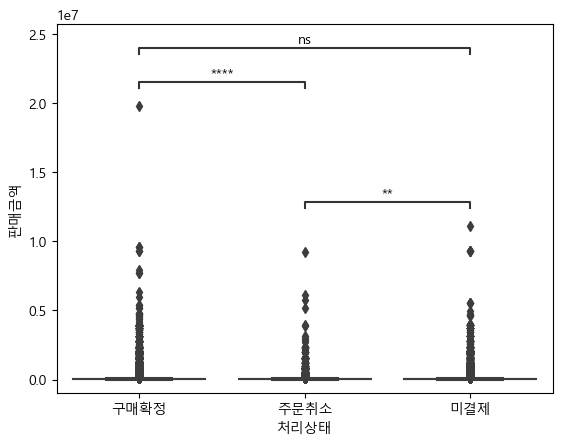

In [132]:
ax = plt.subplot()
ax = sns.boxplot(data=sum_df, x = '처리상태', y='판매금액')
# ax = figure 이름
# data = 분석할 데이터 (여기서는 데이터프레임 형식)
#  x = x축에 위치할 정보 (여기서는 column 이름)
#  y = y축에 위치할 정보 (여기서는 column 이름)
# box_pairs = 분석할 박스플롯의 쌍의 엽력 (리스트로 입력받음, 한 쌍마다 튜플로 묶어둠)
# test = 분석할 T-test의 종류, 모를 경우 여기에 아무거나 입력하고 에러를 발생시키면 가능한 경우를 알려줌
# text_format = T-test  결과를 별 표시로 알려줌, return ckddp 관련 정보를 함께 띄어줌
# loc = 도표 내부에 표시할건지 외부에 표시할건지

# verbose = return 창에 관련 설명을 어디까지 표시할건지
add_stat_annotation(ax, data=sum_df, x = '처리상태', y='판매금액', box_pairs=[(('주문취소'), ('미결제')), (('주문취소'), ('구매확정')), (('구매확정'), ('미결제'))],
                   test='t-test_welch', text_format='star', loc='inside', verbose=2)

In [135]:
from datetime import datetime
import time

In [177]:
month_df = df.copy()